<a href="https://colab.research.google.com/github/boriskuchin/MADMO-BASE-2024/blob/main/07_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия. Метрики качества задачи регрессии. Аналитическое решение

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def custom_print(name, var):
    print(name+':', var, sep='\n', end='\n\n')

# Recap. Задача регрессии

Имеем набор данных $(x_i, y_i)$, где $x_i=(x_i^{(1)}, ..., x_i^{(k)})$. Хотим научиться предсказывать $y_i$ по $x_i$ с помощью функции (модели ML) $f$:

$$\hat{y}_i = f(x_i) = y_i \quad \forall i \in [1, n]$$

Мы живем не в идеальном мире, поэтому строгое равенство для всех объектов одновременно невозможно - в реальных данных всегда есть неустранимый шум. Поэтому точнее будет:

$$\hat{y}_i = f(x_i) \approx y_i \quad \forall i \in [1, n]$$

Но "приблизительно равно" - не очень точная формулировка для нахождения $f(x)$. Поэтому переформулируем задачу - введем **функцию ошибки** (loss function) нашей модели в решении поставленной задачи $L(y, \hat{y})$, тогда:

$$f: \frac{1}{n}\sum_{i=1}^n L(f(x_i), y_i) \to \min$$

Какой вид имеет функция $f$? Какие функции $L$ бывают? На эти вопросы мы сегодня и ответим :)

# Линейная регрессия

**Предположение** - признаки и целевое значение связаны (приблизительно) линейно, т.е.:

$$ \hat{y}_i = f(x_i) = w_0 + w_1 \cdot x_i^{(1)} + w_2 \cdot x_i^{(2)} + ... + w_k \cdot x_i^{(k)}$$

Наша функция зависит от $w_0,...,w_k$ - это параметры модели, их нужно алгоритмически оптимизировать для решения задачи, поэтому часто модель записывают как $f_\theta(x)$, где $\theta$ - весь набор параметров модели.

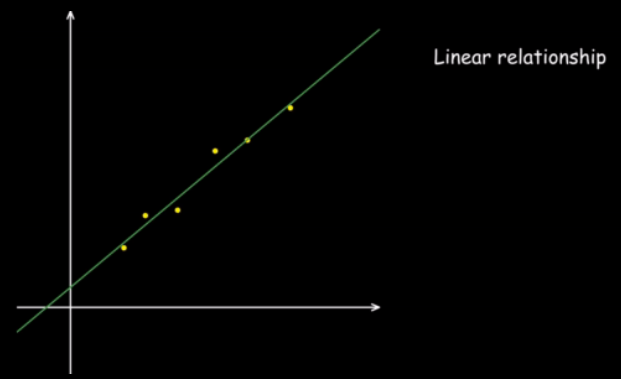

## Идеальная модель

Рассмотрим идеальную ситуацию - существует такая $\theta$, что:

$$f_\theta(x_i) = y_i \quad \forall i$$

Т.е. получили систему уравнений:

$$\begin{equation}
    \begin{cases}
      w_0 + w_1 \cdot x_1^{(1)} + w_2 \cdot x_1^{(2)} + ... + w_k \cdot x_1^{(k)} = y_1\\
      w_0 + w_1 \cdot x_2^{(1)} + w_2 \cdot x_2^{(2)} + ... + w_k \cdot x_2^{(k)} = y_2\\
      ... \\
      w_0 + w_1 \cdot x_n^{(1)} + w_2 \cdot x_n^{(2)} + ... + w_k \cdot x_n^{(k)} = y_n
    \end{cases}\
\end{equation}$$

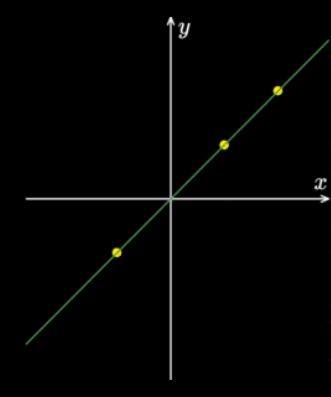

Такую систему удобнее записать в матричном виде:

$$\begin{pmatrix}
	1 & x_1^{(1)} & \cdots & x_1^{(k)} \\
	1 & x_2^{(1)} & \cdots & x_2^{(k)} \\
	\vdots  & \vdots  & \ddots & \vdots  \\
	1 & x_n^{(1)} & \cdots & x_n^{(k)} \\
\end{pmatrix} \cdot \begin{pmatrix}
	w_0 \\
	w_1 \\
	\vdots \\
	w_k
\end{pmatrix} = \begin{pmatrix}
	y_1 \\
	y_2 \\
	\vdots \\
	y_n
\end{pmatrix} \to X \cdot \vec{\theta} = \vec{y}$$

Домножим обе части уравнения на $X^T$, получим слева квадратную матрицу - $X^TX$:

$$X^T X \vec{\theta} = X^T\vec{y}$$

Раз слева есть квадратная матрица, то пусть она будет обратимая, тогда домножим на $(X^TX)^{-1}$ обе части уравнения:

$$\vec{\theta} = (X^TX)^{-1}X^T\vec{y}$$

Но все это в случае существования точного решения системы!

## Неидеальная модель

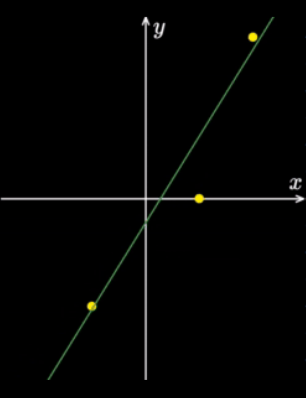

Будем минимизировать ошибку:

$$\frac{1}{n}\sum_{i=1}^n L(f_\theta(x_i), y_i) \to \min\limits_{\theta}$$

Что может быть в качестве функции $L$? Любая функция $L(a, b)$, у которой минимум при $a=b$, в идеале - $L$ должна быть дифференцируемой.

Самые популярные функции потерь:

- **MSE**, mean squared error - $(\hat{y} - y)^2$
- **MAE**, mean absolute error - $|\hat{y} - y|$
- **MAPE**, mean absolute percentage error - $|\frac{\hat{y} - y}{y}|$
- **SMAPE**, mean absolute percentage error - $2|\frac{\hat{y} - y}{\hat{y} + y}|$

От чего зависит выбор? От обучающей выборки и решаемой задачи. У разных функций потерь разные свойства.

### Аналитическое решение

Рассмотрим аналитическое решение для MSE - перейдем к матричной форме:

$$L = \frac{1}{n} ||X\theta - y||^2,$$

где $||v||^2 = \sqrt{\sum_{i=1}^n x_i^2} ^ 2 = \sum_{i=1}^n x_i^2$ - квадрат нормы вектора $v$.

Норму вектора $||v||$ можно записать в другой форме:

$$||v|| = \sqrt{v^Tv}$$

Используем это для $L$:

$$L = \frac{1}{n} (X\theta - y)^T (X\theta - y)$$

MSE - дифференцируемая функция, тогда условие минимума:

$$\begin{equation}
    \begin{cases}
      \frac{\partial}{\partial \theta} L = 0\\
      \frac{\partial^2}{\partial \theta \partial\theta^T} L > 0
    \end{cases}\
\end{equation}$$

Рассмотрим первое уравнение:

$$\frac{\partial}{\partial \theta} L = \frac{1}{n} \frac{\partial}{\partial \theta} (X\theta - y)^T (X\theta - y) = 0$$

Распишем подробнее:

$$\frac{\partial}{\partial \theta} (X\theta - y)^T (X\theta - y) = 0$$

$$2\frac{\partial}{\partial \theta} (X\theta - y) \cdot (X\theta - y) = 0$$

$$X^T(X\theta - y) = 0$$

$$X^TX\theta - X^Ty = 0$$

$$\theta = (X^TX)^{-1}X^Ty$$

Получили решение!

>**ВНИМАНИЕ!**
>
>Необходимое условие - обратимость матрицы $X^TX$.

Рассмотрим второе уравнение:


$$\frac{\partial^2}{\partial \theta\theta^T} L > 0$$

$$\frac{\partial}{\partial \theta^T} X^T(X\theta - y) > 0$$

$$X^T\frac{\partial}{\partial \theta^T} (X\theta - y) > 0$$

$$X^TX > 0$$

Т.е. $X^TX$ должна быть положительно определенной. Это верно, когда все столбцы матрицы $X$ являются попарно независимыми (тогда матрица и обратима).

## Недостатки аналитического решения

Аналитическое решение кажется привлекательным - сразу получаем максимально точное решение. Проверим это:

1. Создадим случайную обучающую выборку и дополним ее единичным столбцом (bias)

In [ ]:
n, k = 10, 3  # Кол-во объектов и признаков
x = np.random.uniform(size=(n, k), low=10, high=50)

# Добавим единичный признак для bias
X = np.hstack([np.ones((n, 1)), x])
X

array([[ 1.        , 19.31125803, 14.61128545, 39.03161912],
       [ 1.        , 24.08907456, 29.89176062, 12.56707338],
       [ 1.        , 22.44207778, 40.03821777, 43.01804052],
       [ 1.        , 20.19654071, 45.48239798, 12.95656297],
       [ 1.        , 26.98103177, 30.67208686, 35.6768126 ],
       [ 1.        , 36.42407659, 46.54431468, 13.35087291],
       [ 1.        , 36.28255256, 18.81643389, 16.40760233],
       [ 1.        , 16.40085642, 35.22078389, 42.46138823],
       [ 1.        , 45.87091058, 28.28356447, 41.88233375],
       [ 1.        , 22.60115259, 44.84131279, 45.55722189]])

2. Создадим случайные веса, с помощью которых создадим целевую переменную

In [ ]:
theta = np.random.uniform(size=(k+1,1), low=-10, high=10)  # Веса
y_precise = X @ theta  # Истинное целевое значение
theta

array([[ 6.44199917],
       [ 7.51321504],
       [ 8.31585674],
       [-9.74118249]])

3. Добавим к целевой переменной нормального шума, посчитаем аналитическое решение и сравним с `theta`

In [ ]:
sigma = 1e-3
y = y_precise + sigma * np.random.randn(*y_precise.shape)  # Зашумленное целевое значение

# Вычисляем аналитически решение
theta_analytical = np.linalg.inv(X.T @ X) @ X.T @ y
theta_analytical

array([[ 6.44265553],
       [ 7.51320233],
       [ 8.31586984],
       [-9.74121362]])

но у него есть пара недостатков:

### Линейно зависимые признаки

В реальных данных могут быть линейно зависимые данные - обратная матрица либо не существует, либо содержит экстремальные значения, с такой неудобно работать.

Проверим как повлияет добавление линейной зависимости к нашим данным:

In [ ]:
def experiment2(n, k, sigma1, sigma2):
    # Данные
    x = np.random.uniform(size=(n, k), low=10, high=50)

    # Создадим линейно зависимый столбец - как взвешанную сумму остальных столбцов
    linear_weights = np.random.uniform(size=(1, k), low=-1, high=1)
    x_linear = np.sum(linear_weights * x, axis=1, keepdims=True)

    # Слегка зашумим ее
    x_almost_linear = x_linear + sigma1 * np.random.randn(*x_linear.shape)
    custom_print('x_almost_linear', x_almost_linear)

    # Объединим новый столбец с остальными
    X = np.hstack([np.ones((n, 1)), x, x_almost_linear])
    custom_print('X', X)

    # Истинные веса
    theta = np.random.uniform(size=(k+2,1), low=-10, high=10)

    # Точные предсказания
    y_precise = X @ theta
    custom_print('theta', theta)

    # Зашумленные предсказания
    y = y_precise + sigma2 * np.random.randn(*y_precise.shape)

    # Инвертируем матрицу
    custom_print('inv_matr', np.linalg.inv(X.T @ X))

    theta_analytical = np.linalg.inv(X.T @ X) @ X.T @ y
    custom_print('theta_analytical', theta_analytical)

In [ ]:
experiment2(n=10, k=3, sigma1=0.0, sigma2=1.0)

x_almost_linear:
[[-6.99420153]
 [-6.56348304]
 [ 5.6078733 ]
 [-4.11933666]
 [ 7.04794817]
 [-8.16534161]
 [-1.95732053]
 [ 9.42264897]
 [-1.12513323]
 [-4.87103243]]

X:
[[ 1.         43.71670236 46.69096897 21.55209203 -6.99420153]
 [ 1.         44.30446232 21.14531628 37.35813755 -6.56348304]
 [ 1.         12.80012234 43.70119288 21.37487507  5.6078733 ]
 [ 1.         36.8479777  38.8880084  25.47386273 -4.11933666]
 [ 1.         17.66959853 30.49990928 42.04871989  7.04794817]
 [ 1.         48.89538777 45.48077373 26.19997458 -8.16534161]
 [ 1.         31.71963032 41.04447666 24.36877515 -1.95732053]
 [ 1.         11.49576722 45.6106913  33.39019981  9.42264897]
 [ 1.         28.8842122  22.6482719  32.36176765 -1.12513323]
 [ 1.         36.92929072 38.27050822 22.93523608 -4.87103243]]

theta:
[[-9.77413247]
 [-1.82930616]
 [ 5.48710112]
 [-4.32020235]
 [ 5.38710718]]



LinAlgError: Singular matrix

Посмотрим, что будет если добавить небольшой шум в линейно зависимый признак:

In [ ]:
experiment2(n=10, k=3, sigma1=0.1, sigma2=1.0)

x_almost_linear:
[[48.7379565 ]
 [64.19730033]
 [46.70681761]
 [38.64215043]
 [44.98767485]
 [49.61157604]
 [48.84015744]
 [34.37280558]
 [49.61212551]
 [42.30373509]]

X:
[[ 1.         10.2655032  45.70249932 49.00006563 48.7379565 ]
 [ 1.         46.56986564 25.87884671 46.3098248  64.19730033]
 [ 1.         36.38384605 15.89314998 32.63331484 46.70681761]
 [ 1.         10.63838601 43.84849878 30.78370141 38.64215043]
 [ 1.         46.26367529 21.89562924 13.11222309 44.98767485]
 [ 1.         30.48413098 35.83544308 31.96209796 49.61157604]
 [ 1.         32.05501718 10.1499627  45.63153561 48.84015744]
 [ 1.         14.8544793  42.74846005 17.91226442 34.37280558]
 [ 1.         30.21290655 22.69691073 41.38743926 49.61212551]
 [ 1.         43.06954845 17.24057222 15.4542218  42.30373509]]

theta:
[[-1.25796006]
 [-2.51842058]
 [-4.15647723]
 [-9.39874751]
 [ 3.45227029]]

inv_matr:
[[ 7.44622425 -1.24364858 -0.71874085 -0.96571964  1.74419189]
 [-1.24364858  5.99767315  3.2332631   

### Вычислительная сложность

Операция получения обратной матрицы - вычислительно сложная, $O(n^3)$. Т.е. при увеличении кол-ва объектов в обучающей выборке в 2 раза, время работы увеличивается приблизительно в 8 раз, а сколько для этого нужно оперативной памяти...

Проведем эксперимент:

In [ ]:
def create_data(n, k, sigma2):
    x = np.random.uniform(size=(n, k), low=-5, high=10)
    X = np.hstack([np.ones((n, 1)), x])

    theta = np.random.uniform(size=(k+1,1), low=-10, high=10)
    y_precise = X @ theta
    y = y_precise + sigma2 * np.random.randn(*y_precise.shape)
    return X, y, theta


def experiment3(X, y):
    theta_analytical = np.linalg.inv(X.T @ X) @ X.T @ y
    custom_print('theta_analytical', theta_analytical)

In [ ]:
X, y, theta_true = create_data(n=1_000_000, k=500, sigma2=0.1)
theta_true.shape

(501, 1)

In [ ]:
(X.T @ X).shape

(501, 501)

In [ ]:
np.linalg.inv(X.T @ X).shape

(501, 501)

Но какие у нас есть альтернативы?

# Градиентный спуск

У градиента есть одно полезное для нас свойство - будучи вектором, он указывает на направление наискорейшего возрастания функции.

Соответственно, если мы домножим градиент на -1, то получим направление наискорейшего убывания функции. А мы как раз хотели бы получить минимум функции потерь...

Т.е. имея некоторое текущее значение $\theta$, вычислив градиент функции потерь в ней, мы будем знать, как менять значения $\theta$, чтобы значение функции потерь стало меньше.

Давайте будем таким образом постепенно изменять значение $\theta$, тем самым уменьшая значение функции потерь:

$$\theta := \theta - \gamma \frac{\partial L(\theta)}{\partial \theta},$$

где $\gamma$ - длина вектора нашего смещения (learning rate).

Формулу для градиента мы получили при аналитическом решении:

$$\frac{\partial L(\theta)}{\partial \theta} = 2 \frac{1}{n}X^T(X\theta - y)$$

## Собственная реализация

In [ ]:
def calc_gradient(theta, X, y):
    y_hat = X @ theta
    error = (y_hat - y)
    gradient = 2 / X.shape[0] * X.T @ (y_hat - y)
    return gradient, np.mean(error ** 2)


def experiment4(X, y, lr=1e-3, tol=1e-5):
    # Стартовые веса
    theta = np.random.randn(X.shape[1], 1)

    iterations = 0
    thetas = []
    losses = []
    while True:
        grad, loss = calc_gradient(theta, X, y)
        new_theta = theta - lr * grad

        # Условие остановки
        if np.sum(abs(new_theta - theta)) < tol:
            print("Converged")
            break

        # Каждые несколько шагов будем выводить информацию
        if iterations % 50 == 0:
            thetas.append(theta.copy())
            losses.append(loss.copy())
            print("Iteration: %d - Error: %.4f" %(iterations, loss))

        iterations += 1
        theta = new_theta
    return np.array(thetas), np.array(losses)

In [ ]:
X, y, theta_true = create_data(n=10_000, k=10, sigma2=0.0)
theta_true

array([[-8.53116865],
       [ 2.97937853],
       [ 6.72495969],
       [ 9.94416923],
       [ 0.49809675],
       [-7.74356726],
       [ 6.88784148],
       [-2.11243959],
       [-1.64299531],
       [-8.87877568],
       [ 0.24955604]])

In [ ]:
thetas, losses = experiment4(X, y, lr=1e-3, tol=1e-3)

Iteration: 0 - Error: 6036.4828
Iteration: 50 - Error: 125.1440
Iteration: 100 - Error: 11.4968
Iteration: 150 - Error: 8.8776
Iteration: 200 - Error: 8.4422
Iteration: 250 - Error: 8.0668
Iteration: 300 - Error: 7.7090
Iteration: 350 - Error: 7.3670
Iteration: 400 - Error: 7.0402
Iteration: 450 - Error: 6.7279
Iteration: 500 - Error: 6.4294
Iteration: 550 - Error: 6.1442
Iteration: 600 - Error: 5.8716
Iteration: 650 - Error: 5.6111
Iteration: 700 - Error: 5.3622
Iteration: 750 - Error: 5.1243
Iteration: 800 - Error: 4.8970
Iteration: 850 - Error: 4.6798
Iteration: 900 - Error: 4.4722
Iteration: 950 - Error: 4.2738
Iteration: 1000 - Error: 4.0842
Iteration: 1050 - Error: 3.9030
Iteration: 1100 - Error: 3.7299
Iteration: 1150 - Error: 3.5644
Iteration: 1200 - Error: 3.4063
Iteration: 1250 - Error: 3.2552
Iteration: 1300 - Error: 3.1108
Iteration: 1350 - Error: 2.9728
Iteration: 1400 - Error: 2.8409
Iteration: 1450 - Error: 2.7148
Iteration: 1500 - Error: 2.5944
Iteration: 1550 - Error: 

In [ ]:
thetas[-1]

array([[ 4.90129106],
       [-3.50498004],
       [ 2.61652363],
       [ 1.37418301],
       [-8.84708221],
       [-7.6058895 ],
       [ 1.34151295],
       [ 3.83830527],
       [ 1.32432172],
       [-6.2627152 ],
       [ 4.93579626]])

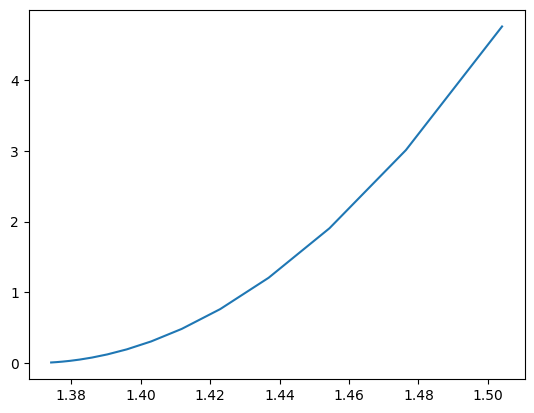

In [ ]:
sns.lineplot(x=thetas[1:,3].flatten(), y=losses[1:,].flatten());

Проверим на шумных данных:

In [ ]:
X, y, theta_true = create_data(n=100_000, k=100, sigma2=1.0)
theta_true[:5]

array([[-9.21623045],
       [-5.64912418],
       [ 2.23157511],
       [-9.83981216],
       [-3.41111941]])

In [ ]:
thetas, losses = experiment4(X, y, lr=1e-3, tol=1e-3)

Iteration: 0 - Error: 63648.5452
Iteration: 50 - Error: 1353.1600
Iteration: 100 - Error: 33.3727
Iteration: 150 - Error: 4.9315
Iteration: 200 - Error: 4.2911
Iteration: 250 - Error: 4.2582
Converged


In [ ]:
thetas[-1][:5]

array([[ 1.3352633 ],
       [-5.68825429],
       [ 2.19167727],
       [-9.87771388],
       [-3.45353993]])

## Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X[:, 1:], y)
theta = np.array([[*reg.intercept_, *reg.coef_[0]]]).T
print(theta[:5])

[[-9.21466682]
 [-5.64881022]
 [ 2.23214396]
 [-9.83893057]
 [-3.41185075]]


In [ ]:
idx = 43
reg.predict(X[[idx], 1:]), y[idx]

(array([[18.75689662]]), array([21.39313763]))

In [ ]:
reg.coef_

array([[-5.64881022,  2.23214396, -9.83893057, -3.41185075,  1.91013973,
         2.88828732, -0.8394807 ,  4.50100124,  6.17311907,  4.07170875,
        -3.91444874,  5.54268364, -5.52264784,  0.18877279, -0.09392733,
         9.03704745,  9.24686322,  9.53286957,  2.89647586, -8.1388975 ,
        -6.34806597,  3.16121706,  2.71467944,  8.7498074 , -8.85409225,
         9.89291235,  1.05115114, -2.45437834, -9.04545102,  2.11063129,
        -0.79021842,  7.59640351,  0.90727153,  2.79760992,  2.03501092,
        -2.98411977,  2.46194471,  1.17434856,  5.25501033,  8.0990461 ,
         4.45627786, -0.50479073,  9.50336013, -4.962037  , -3.43971798,
         3.91840414, -9.19435082, -6.01149752,  8.59197724, -9.94442352,
         0.95174431,  4.16913551, -8.05689929, -9.36848803,  6.0814105 ,
         7.88375726, -1.49643187, -7.61038927,  9.61523269,  0.11420528,
         0.57667014, -0.73151301,  6.33460435, -2.78592893,  2.05948063,
         3.13622104,  9.8669591 ,  4.89020136, -8.7

# Полиномиальная регрессия

Генерируем синтетические данные: берем случайную точку на синусе и добавлять к ней шум. Таким образом получим целевую переменную. Признаком в этом случае будет координата x.

In [ ]:
import pandas as pd
import numpy as np

def generate_data(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_data(100, 250)

Визуализируем набор на графике:

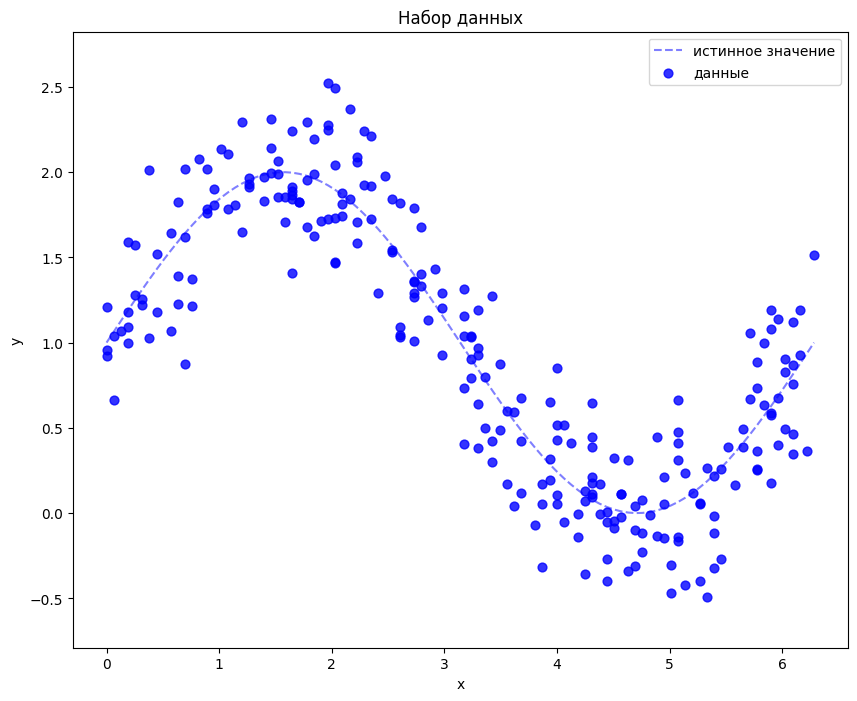

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='истинное значение')
plt.scatter(data['x_train'], data['y_train'], 40, 'b', 'o', alpha=0.8, label='данные')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend()
plt.title('Набор данных')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Реализуем линейную регрессию, используя NumPy:


In [ ]:
# добавим колонку единиц к единственному столбцу признаков - смещения
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
# шаг применения: посчитаем прогноз
y_hat = np.dot(w, X.T)

In [ ]:
w

array([ 1.95115943, -0.30689424])

Отобразим полученное предсказание значения в зависимости от координаты:


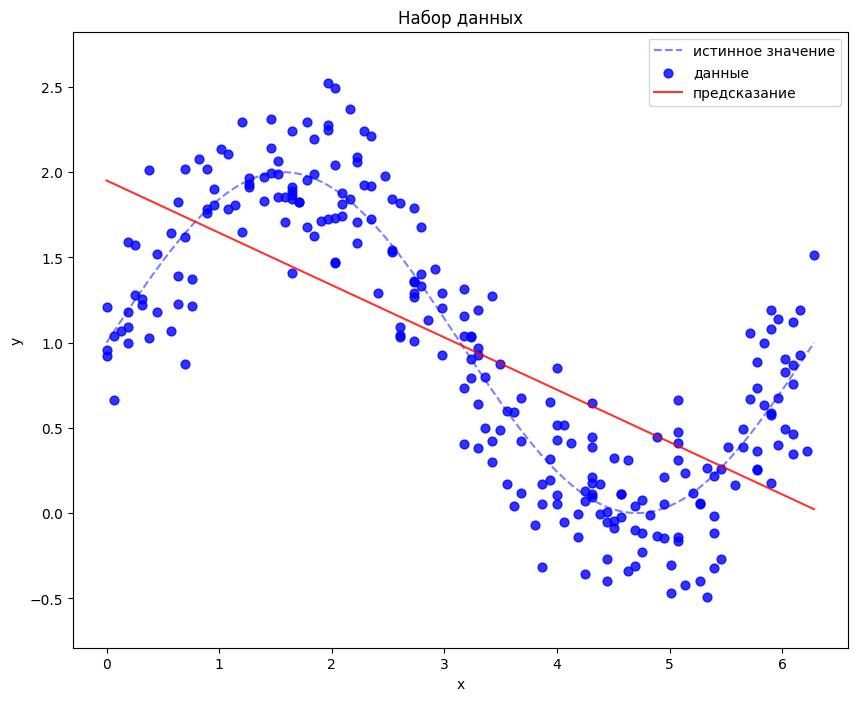

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='истинное значение')
plt.scatter(data['x_train'], data['y_train'], 40, 'b', 'o', alpha=0.8, label='данные')
plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='предсказание')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend()
plt.title('Набор данных')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Даже без метрик качества можно видеть, что предсказание не особо хорошо описывает набор данных.

Добавим новые признаки, которые получим возведением x в разные степени. В таком случае задача все еще будет решаться как и прежде, но размер пространства признаков увеличится: $w_0 +w_1 x + w_2 x^2 + ... + x_n x^p$

>Примечание
>
>Для двух признаков: $f(x_1, x_2) = w_0 +w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$

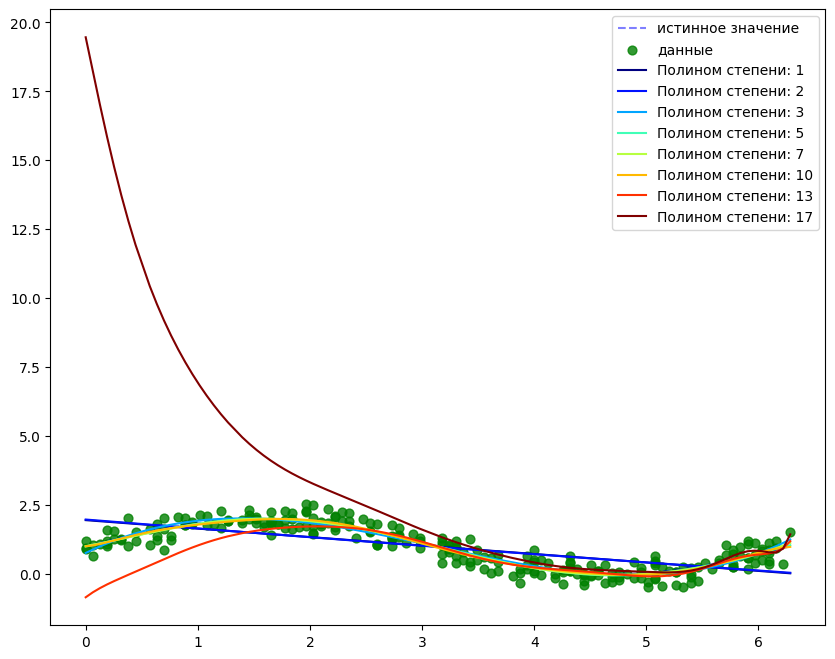

In [ ]:
# список степеней p полиномов, которые тестируются
degree_list = [1, 2, 3, 5, 7, 10, 13, 17, 33]
degree_list = [1, 2, 3, 5, 7, 10, 13, 17]

plt.figure(figsize=(10, 8)) # устанавливаем размер фигуры
cmap = plt.get_cmap('jet') # получаем цветовую палитру для линий
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))] # задает набор разных цветов для линий

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='истинное значение') # отображаем данные с параметрами
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='данные')

w_list = []
err = []
for ix, degree in enumerate(degree_list): # проходимся по полиномам и строим модель на новых данных
    # список с предрасчитанными степенями признака
    dlist = [np.ones(data['x_train'].shape[0])] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label=f'Полином степени: {degree}')
    plt.legend()

При увеличении степени полинома, средняя ошибка продолжает уменьшаться, хотя по идее кубический полином должен лучше всего описывать синусоидальные данные. Это явный признак переобучения, его можно заметить по визуализации даже без тестовых данных: при увеличении степени полинома выше третьей модель начинает интерполировать данные, вместо экстраполяции.

Другими словами, график функции проходит точно через точки из тренировочного набора данных, причем чем выше степень полинома, тем через большее количество точек он проходит. Степень полинома отражает сложность модели.


Таким образом, сложные модели, у которых степеней свободы достаточно много, могут попросту запомнить весь тренировочный набор, полностью теряя обобщающую способность. Это и есть проявление негативной стороны принципа минимизации эмпирического риска.

Рассмотрим амплитуду параметров полиномиальной регрессии. При увеличении степени полинома, размах значений коэффициентов растет почти экспоненциально, визуализируем:


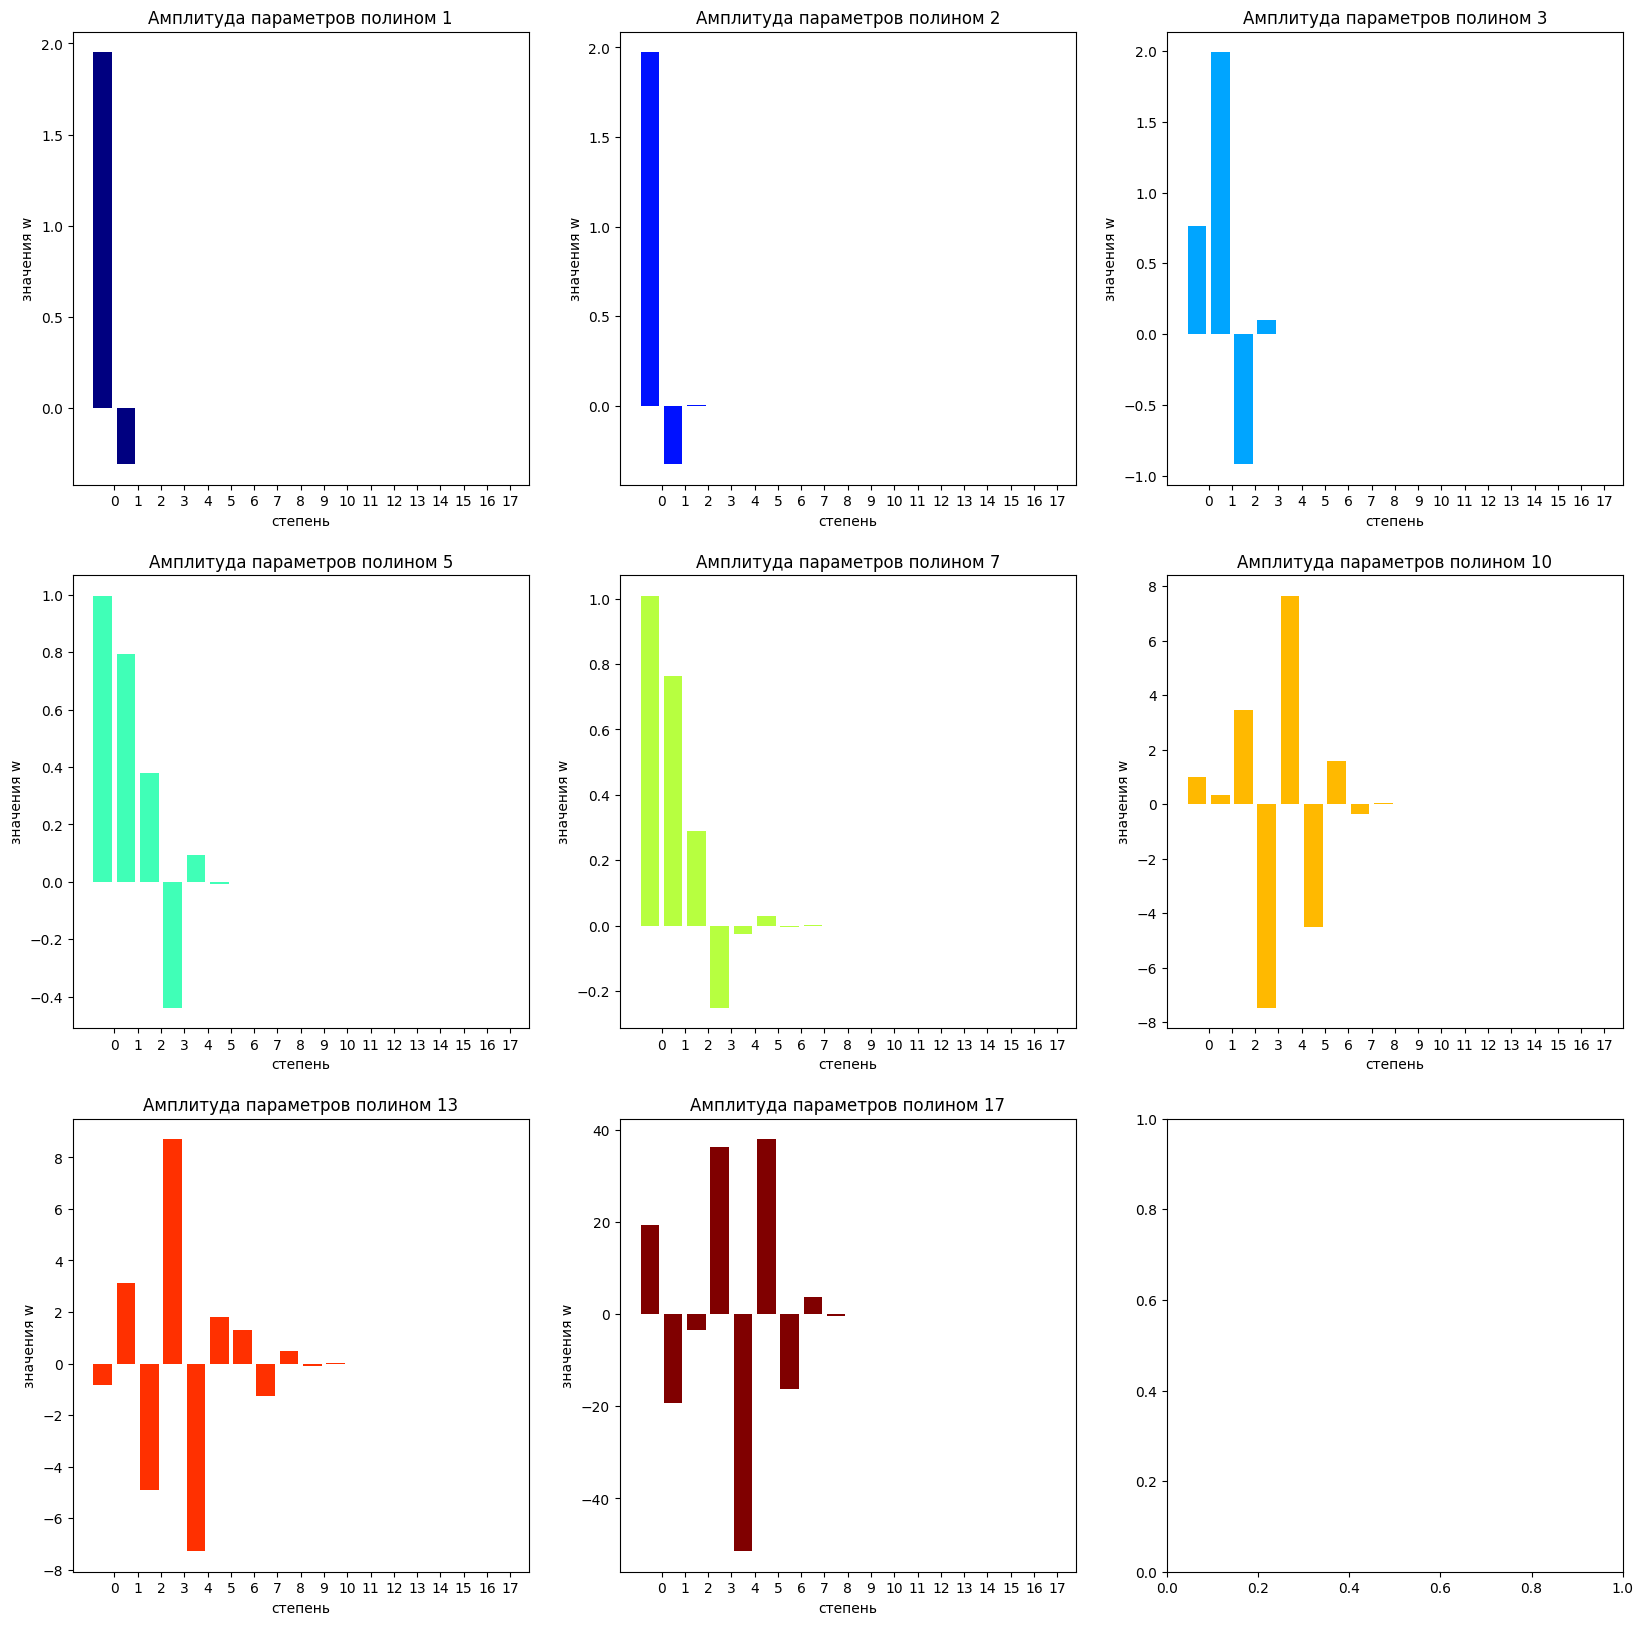

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 20))

for ix, t, ax in zip(range(len(w_list)), w_list, axes.flatten()):
    degree, w = t
    ax.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    ax.set_title('Амплитуда параметров полином ' + str(degree))
    ax.set_xlabel('степень')
    ax.set_ylabel('значения w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
plt.show()

# Метрики качества

Для задачи регрессии в качестве метрик используются те же функции, что используются и в качестве функции потерь:

- **MSE**, mean squared error - $(\hat{y} - y)^2$
- **RMSE**, $\sqrt{\sum(\hat{y_i} - y_i)^2}$
- **MAE**, mean absolute error - $|\hat{y} - y|$
- **MAPE**, mean absolute percentage error - $|\frac{\hat{y} - y}{y}|$
- **sMAPE**, mean absolute percentage error - $2|\frac{\hat{y} - y}{\hat{y} + y}|$

Чем обусловлен выбор метрики? Данными.

- По умолчанию - **MSE**, стабильная, хорошая
- В данных есть выбросы - **MAE**, более устойчива к выбросам
- В данных есть целевые значения разного масштаба - **MAPE / sMAPE**

Сравним устойчивость MSE и MAE к выбросам.

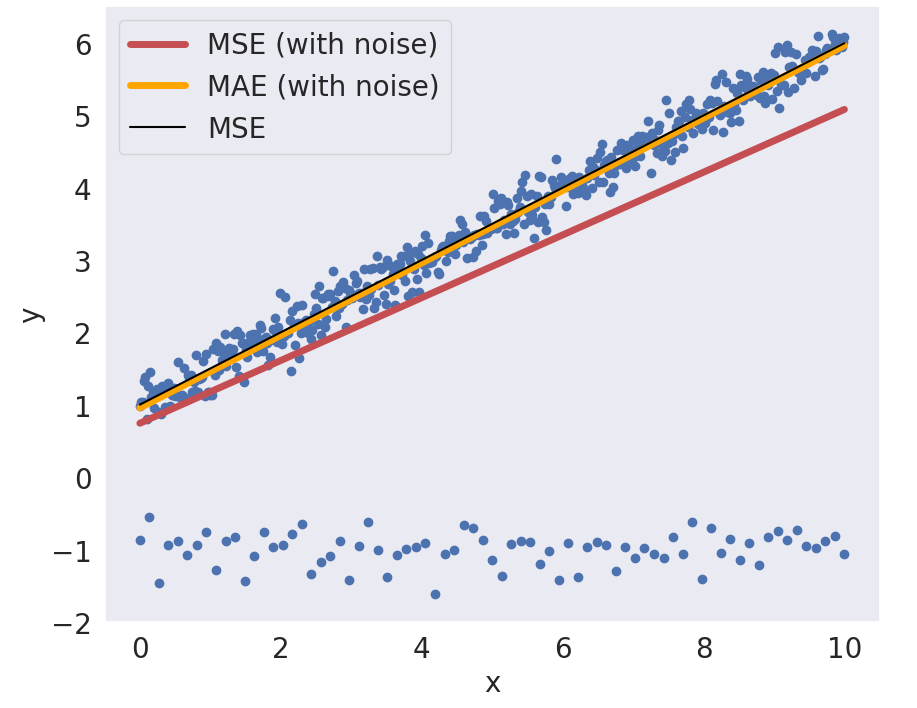

In [ ]:
from sklearn import preprocessing

In [ ]:
preprocessing.PolynomialFeatures?